# mmdcalc
Extract the keys of a calculator.

## Description

This procedure detects the keys in a gray-scale image of a calculator. The approach used is watershed Beucher's paradigm. The internal markers are the numbers on the keys and the external markers are obtained by the skiz of the keys background. 

In [1]:
import numpy as np
from PIL import Image
import ia870 as ia


# Reading
The gray-scale image of the calculator is read. 

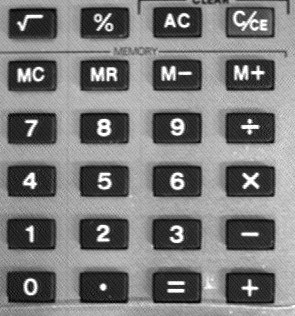

In [2]:
a_pil = Image.open('data/keyb.tif')
a = np.array(a_pil)
a_pil

## Gradient image
The image edges are enhanced by the gradient operator. 

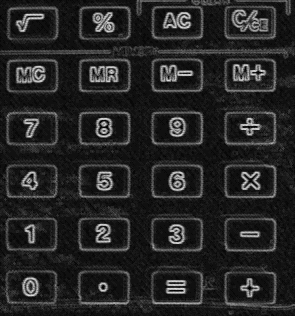

In [3]:
b = ia.iagradm(a, ia.iasebox());
Image.fromarray(ia.iagshow(b).transpose(1, 2, 0))

## Inside marker: Opening top-hat
The opening top-hat procedure enhances the small objects relatively to its background. In the calculator image, the digits are enhanced.

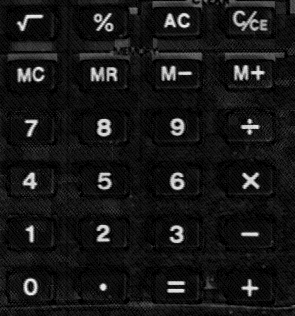

In [4]:
c = ia.iaopenth(a,ia.iasebox(5))
Image.fromarray(ia.iagshow(c).transpose(1, 2, 0))

## Inside marker Thresholding

The threshold operator is used to separated the enhanced objects. This procedure is quite robust, since the background was reduced to very low levels with the opening top-hat. 

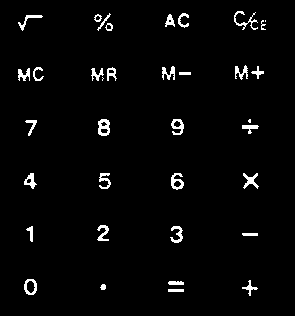

In [5]:
d = c > 150
Image.fromarray(ia.iagshow(d).transpose(1, 2, 0))

## Inside marker: Final
In order to have just one object (i.e., connected component) inside each key, a dilation is applied. 

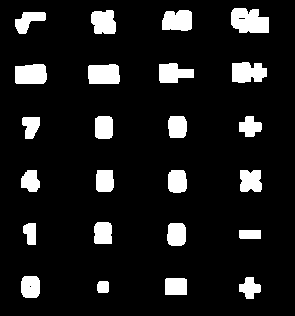

In [6]:
e = ia.iadil(d, ia.iasebox(3))
Image.fromarray(ia.iagshow(e).transpose(1, 2, 0))

## Outside markers
The outside markers are built by taking the watershed (skiz) of the complement of internal markers image. 

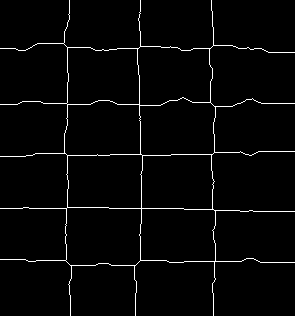

In [7]:
f = ia.iawatershed(ia.ianeg(e));
Image.fromarray(ia.iagshow(f).transpose(1, 2, 0))

## Both markers
The markers used are the union of the internal and external markers detected. They are displayed as overlay on the gradient image. 

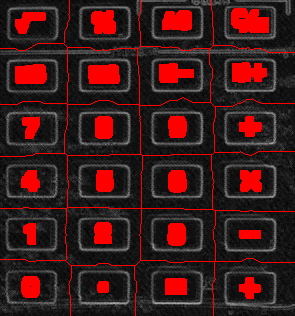

In [8]:
g = ia.iaunion(e,f)
Image.fromarray(ia.iagshow(b, g).transpose(1, 2, 0))

## Constrained watershed
The calculator keys are extracted by applying the watershed operator on the gradient image, constrained by the markers detected.

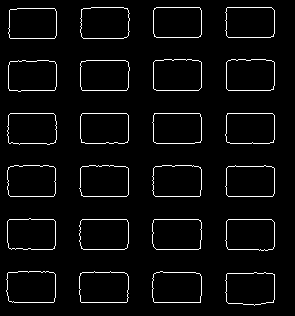

In [9]:
h = ia.iacwatershed(b,g,ia.iasebox());
Image.fromarray(ia.iagshow(h).transpose(1, 2, 0))

## Show the result
Superposition of the detected contours on the input image. 

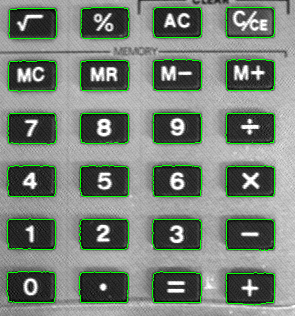

In [10]:
Image.fromarray(ia.iagshow(a, h, h).transpose(1, 2, 0))